In [13]:
import pandas as pd
df = pd.read_csv('datasetALLALONE.csv')
df


,PlayerID,GameSession,PlayerScore,ItemsCollected,ConnectionPing,SessionDuration,NumKills,Accuracy,NumDeaths,GameLevel,MaxCombo,WeaponType,NumBoosts,GameRegion,ProfilePic
0,4275,32045,4499,108,185.909274,19.784009,18,0.942397,6,26,324,Gun,0,NaN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,4243,97670,3927,135,233.284384,5.690667,9,0.425337,16,11,148,Gun,0,ASIA,"[(33, 144, 52), (18, 150, 39), (11, 142, 32), ..."
2,9556,36024,2316,75,142.548518,11.999654,79,0.315410,4,8,138,Bow,0,NaN,"[(33, 144, 52), (18, 150, 39), (11, 142, 32), ..."
3,4143,49722,5288,66,116.483028,8.387374,88,0.663248,16,45,157,Gun,0,EU,"[(35, 31, 32), (35, 31, 32), (35, 31, 32), (35..."
4,7692,72540,977,83,149.172503,41.509770,47,0.108453,23,31,429,Gun,7,ASIA,"[(255, 255, 255), (255, 255, 255), (255, 255, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15015,6307,56705,2663,137,231.393583,48.624616,9,0.528982,29,30,409,Sword,4,ASIA,"[(1, 19, 33), (1, 19, 33), (1, 19, 33), (1, 19..."
15016,8246,80414,7368,111,200.985852,71.643607,25,0.152723,29,46,68,Gun,10,EU,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
15017,2406,87741,3041,111,197.942136,1.483322,47,0.920399,21,16,361,Sword,7,EU,"[(255, 255, 255), (255, 255, 255), (255, 255, ..."
15018,3670,68978,1413,87,159.069415,1.176356,18,0.441046,34,7,123,Bow,5,EU,"[(255, 255, 255), (255, 255, 255), (255, 255, ..."


In [14]:
from sklearn.ensemble import IsolationForest
contamination = 20 / 15000

clf = IsolationForest(contamination=contamination, random_state=42)
df['anomaly'] = clf.fit_predict(df[['ConnectionPing', 'ItemsCollected']])

print(df['anomaly'].value_counts()) 

anomaly
 1    15000
-1       20
Name: count, dtype: int64


In [15]:
anomalies = df[df['anomaly'] == -1]
anomalies

,PlayerID,GameSession,PlayerScore,ItemsCollected,ConnectionPing,SessionDuration,NumKills,Accuracy,NumDeaths,GameLevel,MaxCombo,WeaponType,NumBoosts,GameRegion,ProfilePic,anomaly
1122,8610,99088,934,2632,3037.789258,56.349730,100,0.502544,22,15,454,Sword,1,NaN,"[(1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (...",-1
1286,8936,70538,315,3496,1346.582912,3.205878,31,0.440716,21,30,327,Sword,10,EU,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-1
1301,7387,14805,212,3289,5511.937793,71.345212,95,0.399458,34,44,308,Sword,9,ASIA,"[(1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (...",-1
1451,8334,20880,512,3472,2172.671787,0.013169,32,0.246525,46,49,286,Sword,10,ASIA,"[(0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (...",-1
2956,5125,73203,967,2200,2957.410625,45.032283,100,0.560079,25,15,356,Sword,1,EU,"[(255, 227, 255), (255, 251, 255), (205, 226, ...",-1
4106,3946,20691,912,2555,1318.414616,28.030256,41,0.411469,6,24,241,Gun,7,EU,"[(21, 19, 22), (21, 19, 22), (21, 19, 22), (21...",-1
4864,2780,17485,789,5280,3462.611971,22.353039,0,0.271042,13,9,256,Bow,8,EU,"[(255, 227, 255), (255, 251, 255), (205, 226, ...",-1
5210,1213,92579,378,4160,593.980893,29.698506,98,0.420327,33,24,123,Gun,0,ASIA,"[(175, 175, 175), (175, 175, 175), (175, 175, ...",-1
6846,8472,74191,999,3120,347.471843,17.410562,79,0.184272,12,28,50,Bow,10,EU,"[(253, 253, 253), (253, 253, 253), (252, 252, ...",-1
6905,9450,80884,945,5206,1357.125785,7.123814,97,0.672947,32,32,367,Bow,7,NaN,"[(0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (...",-1


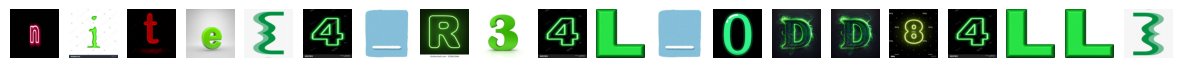

In [16]:
from PIL import Image
import matplotlib.pyplot as plt

anomalies_sorted = anomalies.sort_values('PlayerScore')

plt.figure(figsize=(15, 2))
for i, profile_data in enumerate(anomalies_sorted['ProfilePic']):
    img = Image.new('RGB', (256, 256))
    img.putdata(eval(profile_data))  
    
    plt.subplot(1, len(anomalies_sorted), i + 1)
    plt.imshow(img)
    plt.axis('off')  


plt.show()
